Bar Plots

In [1]:
import sys
import os
import pandas as pd
from os.path import abspath, join as path_join
import numpy as np
import ConfigSpace as CS
import json
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
PARENT_DIR =  path_join(os.getcwd(), "..", "..")
sys.path.insert(0, PARENT_DIR)
#from autoda.data_augmentation import ImageAugmentation
from fanova import fANOVA
from fanova import visualizer



sns.set_style(style='whitegrid')


plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rc('font', size=15.0, family='serif')
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

In [2]:

benchmarks = ["AlexNet","ResNet", "WideResNet"]

Bar Plots for Hyperband Results on AlexNet

/home/misgana/AutoDA/notebooks/../../AutoData


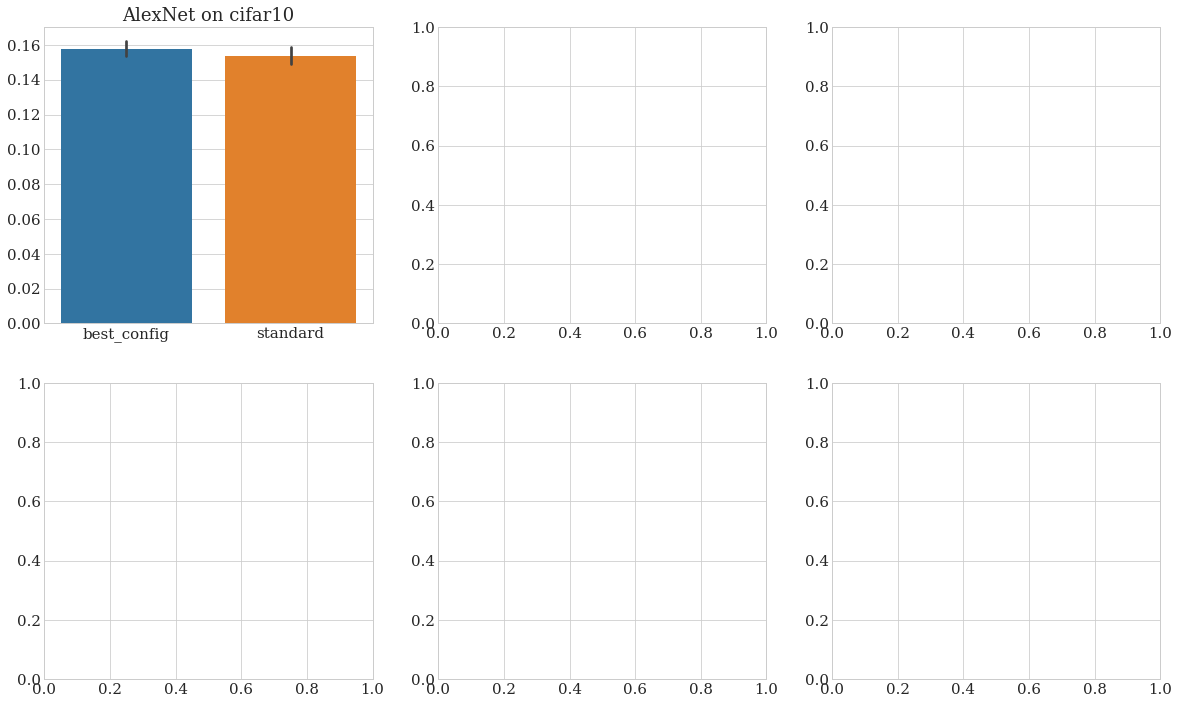

In [31]:
import pandas as pd
from itertools import product
from glob import glob
from collections import OrderedDict
from itertools import product
from collections import OrderedDict


path = path_join(abspath("."), "..", "..", "AutoData")
print(path)
msg = "Results to plot do not exist. Check path. {}".format(path)
assert os.path.exists(path), msg

optimizers = ("hyperband", "BOHB",)
datasets = ("cifar10", "cifar100",)
markers = (
    "best_config", 
    "standard", 
#    "no_augment"
)

hyperband = path_join(path, ("cifar10/hyperband"))


# XXX: OrderedDict everywhere!
def read_data(dataset, benchmark="AlexNet", markers=markers):
    base_path = path_join(hyperband, benchmark)
    filenames = OrderedDict(tuple(
        (marker, sorted(glob("{base_path}/{marker}*{dataset}*.json".format(base_path=base_path, marker=marker, dataset=dataset))))
        for marker in markers
    ))
    
    def read_files(marker_filenames):
        data = []
        for filename in marker_filenames:
            with open(filename, "r") as f:
                json_content = json.load(f)
                try:
                    data.append(json_content["best_run_info"]["info"]["validation_error"])
                except KeyError:  # standard does not have "info" key
                    data.append(json_content["best_run_info"]["validation_error"])
        return data
    
    data = OrderedDict(tuple(
        (marker, read_files(marker_filenames))
        for marker, marker_filenames in filenames.items()
    ))
    return data


data = OrderedDict(tuple(
    ((dataset, benchmark), list(read_data(dataset=dataset, benchmark=benchmark).values()))
    for dataset, benchmark in product(datasets, benchmarks)
))

num_plots = len(list(data.keys()))
num_plots_side_by_side = len(benchmarks)

num_rows = num_plots // num_plots_side_by_side 
num_columns = num_plots_side_by_side

f, axes = plt.subplots(num_rows, num_columns, sharex=False, figsize=(20, 12))
indices = product(range(num_rows), range(num_columns))
axes_iterator = iter(axes)

for (dataset, benchmark), results in data.items():
    if not(all(result for result in results)):
        continue
    row, column = next(indices)
    axis = axes[row][column]
    axis.set_title("{benchmark} on {dataset}".format(benchmark=benchmark, dataset=dataset))
    sns.barplot(data=pd.DataFrame({marker: marker_data for marker, marker_data in zip(markers, results)}), ax=axis)

In [6]:
data = pd.DataFrame({"best_config": best_config, "standard": standard})
ax = sns.barplot(data=data)

NameError: name 'best_config' is not defined

Model-based Hyperband results on cifar10 and AlexNet

In [59]:

   
path = path_join(abspath("."), "..", "..", "AutoData")
print(path)
msg = "Results to plot do not exist. Check path. {}".format(path)
assert os.path.exists(path), msg

optimizers = ["hyperband", "BOHB"]
datasets = ["cifar10", "cifar100"]

BOHB = path_join(path, ("cifar10/BOHB"))
print(hyperband)
best_config  = []
standard = []
for d in datasets:
    p = dict()

    n_runs = 5
    for i in range(1, n_runs):
        try:
            from os.path import abspath, join as path_join
            best_config_path = "AlexNet/best_config_hyperband_%s_%d.json" % (d, i)
            filename = path_join(BOHB, best_config_path)
            print(filename)
            with open(filename, "r") as f:
                res = json.load(f)
        except FileNotFoundError:
            print(i, d)
            continue
        best_config.append(res["best_run_info"]["info"]["validation_error"])
        try:
            from os.path import abspath, join as path_join
            standard_path = "AlexNet/standard/standard_hyperband_%s_%d.json" % (d, i)
            filename2 = path_join(BOHB, standard_path)
            with open(filename2, "r") as f:
                res2 = json.load(f)
        except FileNotFoundError:
            print(i, d)
            continue
        standard.append(res2["best_run_info"]["validation_error"])
print(standard)

/mhome/negassim/AutoDA/notebooks/../../AutoData
/mhome/negassim/AutoDA/notebooks/../../AutoData/cifar10/hyperband
/mhome/negassim/AutoDA/notebooks/../../AutoData/cifar10/BOHB/AlexNet/best_config_hyperband_cifar10_1.json
1 cifar10
/mhome/negassim/AutoDA/notebooks/../../AutoData/cifar10/BOHB/AlexNet/best_config_hyperband_cifar10_2.json
2 cifar10
/mhome/negassim/AutoDA/notebooks/../../AutoData/cifar10/BOHB/AlexNet/best_config_hyperband_cifar10_3.json
3 cifar10
/mhome/negassim/AutoDA/notebooks/../../AutoData/cifar10/BOHB/AlexNet/best_config_hyperband_cifar10_4.json
4 cifar10
/mhome/negassim/AutoDA/notebooks/../../AutoData/cifar10/BOHB/AlexNet/best_config_hyperband_cifar100_1.json
1 cifar100
/mhome/negassim/AutoDA/notebooks/../../AutoData/cifar10/BOHB/AlexNet/best_config_hyperband_cifar100_2.json
2 cifar100
/mhome/negassim/AutoDA/notebooks/../../AutoData/cifar10/BOHB/AlexNet/best_config_hyperband_cifar100_3.json
3 cifar100
/mhome/negassim/AutoDA/notebooks/../../AutoData/cifar10/BOHB/AlexNet